In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


In [2]:
df_train = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


According to the dataset, we have 14 columns and in these columns three of them are categorical features and the rest is numerical features. Also, we do not have any NaN value in our dataset.

# Data Analysis

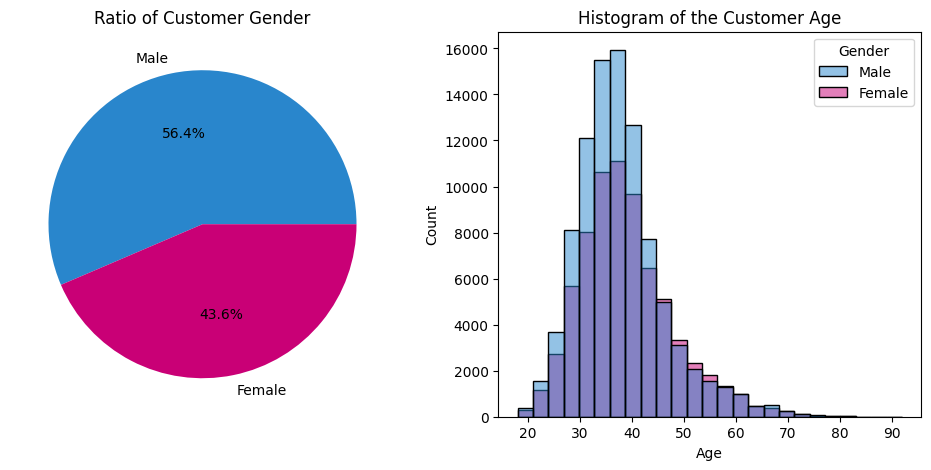

In [4]:
palette = ['#2986cc', '#c90076']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.pie(df_train['Gender'].value_counts().values, labels = df_train['Gender'].value_counts().index, autopct='%1.1f%%', colors = palette)
ax1.set_title('Ratio of Customer Gender')

sns.histplot(data=df_train, x='Age', hue='Gender', palette=palette, bins = 25, ax = ax2)
ax2.set_title('Histogram of the Customer Age')
plt.show()

When the pie chart is examined, approximately 56% of the bank's customers are male customers. According to the histogram, the bank has customers from many age groups. The majority of incoming customers are between the ages of 30-40.

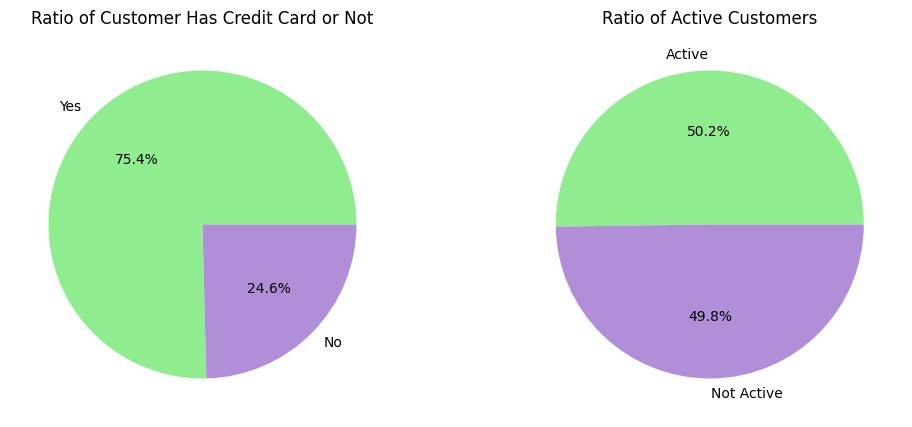

In [5]:
colors = ['#8fed8f', '#b08fd8']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.pie(df_train['HasCrCard'].value_counts().values, labels = ['Yes','No'], autopct='%1.1f%%', colors = colors)
ax1.set_title('Ratio of Customer Has Credit Card or Not')

ax2.pie(df_train['IsActiveMember'].value_counts().values, labels = ['Active','Not Active'], autopct='%1.1f%%', colors = colors)
ax2.set_title('Ratio of Active Customers')

plt.show()

While approximately 75% of bank customers have a credit card, approximately 25% do not have a credit card. When the activity status of the customers is examined, the ratio of the number of active and inactive customers is very close to each other. As seen in the pie chart, approximately 50.2% of customers are active.

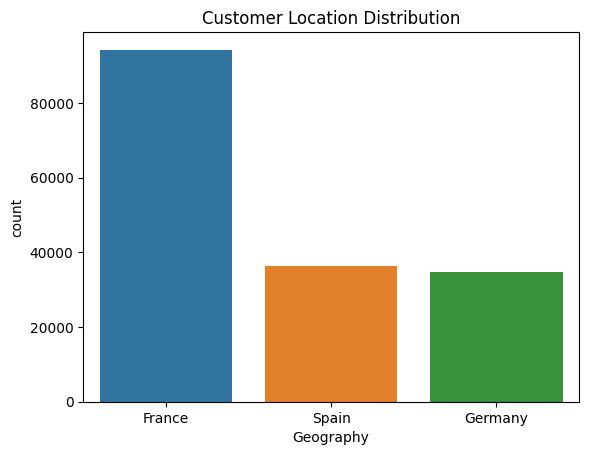

In [6]:
sns.countplot(data = df_train, x = "Geography")
plt.title("Customer Location Distribution")
plt.show()

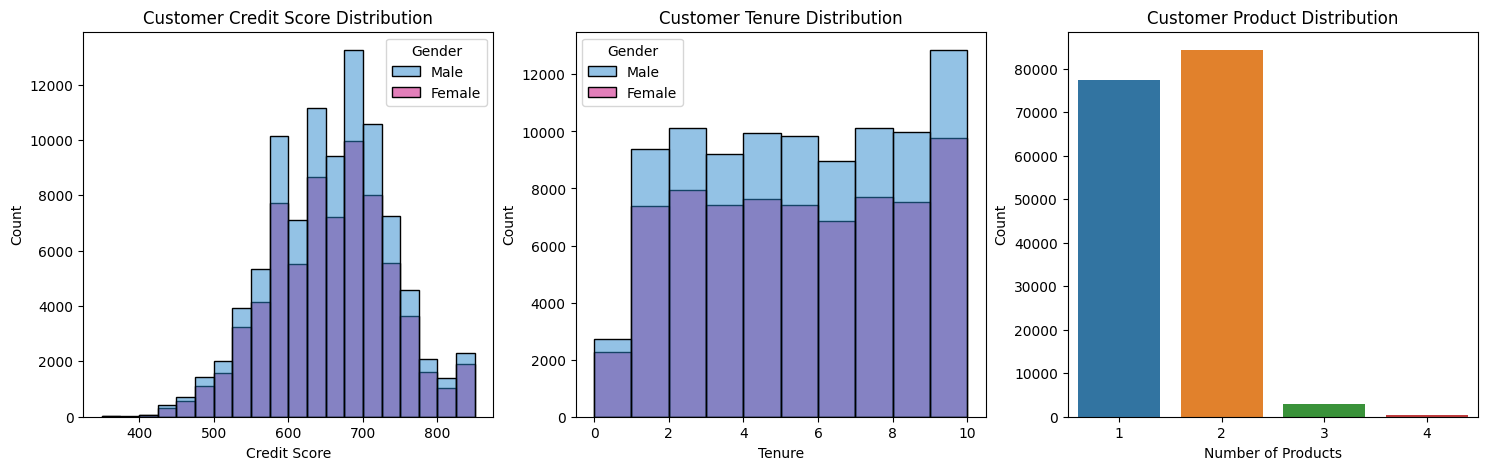

In [7]:
palette = ['#2986cc', '#c90076']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(data = df_train, x = 'CreditScore', hue = 'Gender', palette = palette, bins = 20, ax = ax1)
ax1.set_title('Customer Credit Score Distribution')
ax1.set_xlabel('Credit Score')

sns.histplot(data = df_train, x = 'Tenure', hue = 'Gender', palette = palette, bins = 10, ax = ax2)
ax2.set_title('Customer Tenure Distribution')

sns.countplot(data = df_train, x = 'NumOfProducts', ax = ax3)
ax3.set_title('Customer Product Distribution')
ax3.set_xlabel('Number of Products')
ax3.set_ylabel('Count')

plt.show()

When customers' credit scores are examined, it is seen that the majority of the scores are between 600-700. In addition, the majority of customers have been customers of the bank for 10 years.

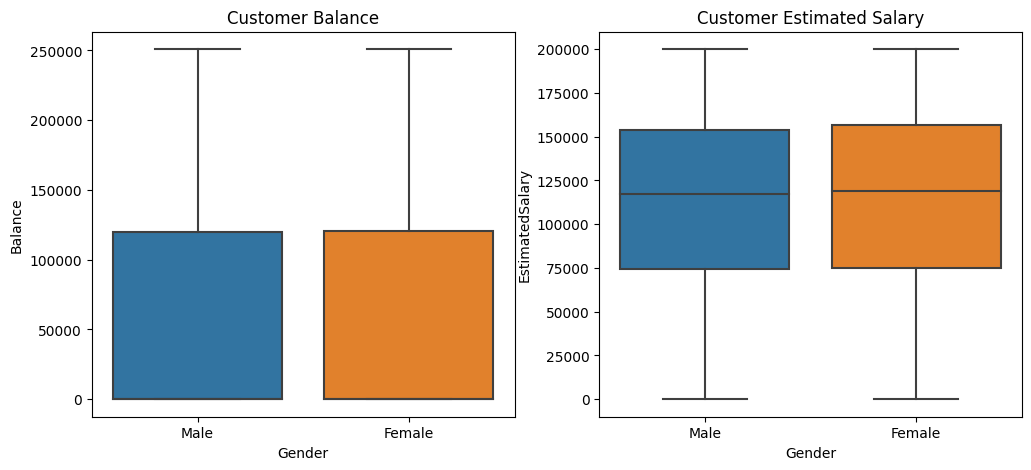

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data = df_train, x = 'Gender', y = 'Balance', ax = ax1)
ax1.set_title('Customer Balance')

sns.boxplot(data = df_train, x = 'Gender', y = 'EstimatedSalary', ax = ax2)
ax2.set_title('Customer Estimated Salary')
plt.show()

# Modelling

In [9]:
# "id", "CustomerId", "Surname" columns do not have any effect on predicting Exited or not.
# Therefore, I will drop these columns from dataset.
# Also, will drop the class dataset.
X = df_train.drop(columns = ['id', 'CustomerId', 'Surname', 'Exited'])
y = df_train['Exited']
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83


In [10]:
# Converting float to integer
# "HasCrCard" and "IsActiveMember" column variables were float.
X['Age'] = X['Age'].astype(int)
X['HasCrCard'] = X['HasCrCard'].astype(int)
X['IsActiveMember'] = X['IsActiveMember'].astype(int)

In [11]:
# Encoding
X_new = pd.get_dummies(X, columns = ['Geography', 'Gender'])
X_new.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,668,33,3,0.00,2,1,0,181449.97,True,False,False,False,True
1,627,33,1,0.00,2,1,1,49503.50,True,False,False,False,True
2,678,40,10,0.00,2,1,0,184866.69,True,False,False,False,True
3,581,34,2,148882.54,1,1,1,84560.88,True,False,False,False,True
4,716,33,5,0.00,2,1,1,15068.83,False,False,True,False,True


In [12]:
# Scaling
scaler = StandardScaler()

features = ['EstimatedSalary', 'Balance', 'CreditScore', 'Age', 'Tenure']
for i in features:
    X_new[i] = scaler.fit_transform(X_new[[i]])

X_new.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.144135,-0.578074,-0.719973,-0.883163,2,1,0,1.369486,True,False,False,False,True
1,-0.367706,-0.578074,-1.432694,-0.883163,2,1,1,-1.254085,True,False,False,False,True
2,0.268974,0.211354,1.774548,-0.883163,2,1,0,1.437422,True,False,False,False,True
3,-0.941966,-0.465298,-1.076334,1.486918,1,1,1,-0.557018,True,False,False,False,True
4,0.743362,-0.578074,-0.007253,-0.883163,2,1,1,-1.938770,False,False,True,False,True


In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state = 42, stratify = y)

# XGBoost

In [14]:
# XGBoost
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", use_label_encoder=False)

xgb_model.fit(X_train, y_train)

xgb_predictions = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"Accuracy Score: {xgb_accuracy}")

Accuracy Score: 0.8641023776630553


# LightGBM

In [15]:
# LightGBM
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(
    objective = 'binary',
    metric = 'binary_logloss',
    boosting_type = 'gbdt',
    num_leaves = 31,
    learning_rate = 0.05,
    feature_fraction = 0.9,
    n_estimators = 100)

lgb_model.fit(X_train, y_train)

lgb_predictions = lgb_model.predict(X_test)
lgb_accuracy = accuracy_score(y_test, lgb_predictions)
print(f"Accuracy Score: {lgb_accuracy}")

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
Accuracy Score: 0.865265760197775


# Random Forest

In [16]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Accuracy Score: {rf_accuracy}")

Accuracy Score: 0.8566858140042173


In [17]:
# Among three different models, LightGBM gave the best accuracy score. 
# Therefore, I will tune hyperparameters of LightGBM.
#param_grid = {
#    'boosting_type' : ['gbdt', 'dart', 'goss'],
#    'num_leaves' : [31, 40, 50],
#    'learning_rate' : [0.02, 0.05, 0.1],
#    'n_estimators' : [100, 150, 200]
#}

#lgb_model = lgb.LGBMClassifier()

#grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, scoring='accuracy', cv=3)
#grid_result = grid_search.fit(X_train, y_train)

#print("Best Parameters:", grid_result.best_params_)
#print("Best Accuracy Score:", grid_result.best_score_)

#best_model = grid_result.best_estimator_
#predictions = best_model.predict(X_test)

#accuracy = accuracy_score(y_test, predictions)
#print(f"Test Data Accuracy: {accuracy}")

In [18]:
#cm = confusion_matrix(y_test, predictions)

#plt.figure(figsize=(6, 4))
#sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
#plt.xlabel('Predictions')
#plt.ylabel('Real Values')
#plt.title('Confusion Matrix')
#plt.show()

# Voting Classifier

In [19]:
from sklearn.ensemble import VotingClassifier

xgb_model = xgb.XGBClassifier(learning_rate =  0.2, max_depth = 4, n_estimators = 150)
lgb_model = lgb.LGBMClassifier(
    objective = 'binary',
    metric = 'binary_logloss',
    boosting_type = 'gbdt',
    num_leaves = 40,
    learning_rate = 0.05,
    feature_fraction = 0.9,
    n_estimators = 150)

voting_clf = VotingClassifier(
    estimators = [('xgb', xgb_model), ('lgb', lgb_model)], voting = 'soft', verbose = False)

voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Voting Classifier: {accuracy:.4f}")

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
Accuracy of Voting Classifier: 0.8664


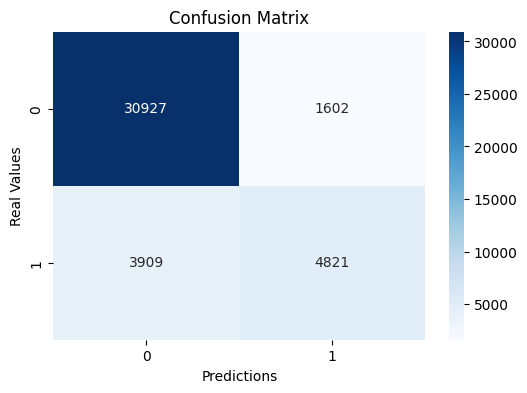

In [20]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predictions')
plt.ylabel('Real Values')
plt.title('Confusion Matrix')
plt.show()

# Prediction on Test Data

In [21]:
# Loading Test Data
df_test = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')
df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [23]:
# Removing unnecessary columns
df_test_new = df_test.drop(columns = ['id','CustomerId', 'Surname'])

# Converting float features to int
df_test_new['HasCrCard'] = df_test_new['HasCrCard'].astype(int)
df_test_new['IsActiveMember'] = df_test_new['IsActiveMember'].astype(int)
df_test_new['Age'] = df_test_new['Age'].astype(int)

# Encoding
df_test_new = pd.get_dummies(df_test_new, columns = ['Geography', 'Gender'])

# Scaling
scaler = StandardScaler()

features = ['EstimatedSalary', 'Balance', 'CreditScore', 'Age', 'Tenure']
for i in features:
    df_test_new[i] = scaler.fit_transform(df_test_new[[i]])
df_test_new.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.878176,-1.706501,-1.067887,-0.881274,2,0,1,0.967874,True,False,False,True,False
1,0.329567,0.888994,-1.067887,-0.881274,1,1,0,-0.790939,True,False,False,True,False
2,-0.006609,-0.465177,0.713922,-0.881274,2,1,0,0.528413,True,False,False,True,False
3,0.304665,-0.239482,1.070284,-0.881274,1,1,0,0.032150,True,False,False,False,True
4,1.188684,-0.013787,1.783008,1.050038,1,1,0,0.539331,False,True,False,False,True


In [24]:
test_predictions = (voting_clf.predict_proba(df_test_new))[:,1]

In [25]:
test_predictions

array([0.03159919, 0.79217938, 0.02819012, ..., 0.01681643, 0.14480718,
       0.18724002])

In [26]:
output = pd.DataFrame({'id': df_test.id, 'Exited': test_predictions})
output.head()

,id,Exited
0,165034,0.031599
1,165035,0.792179
2,165036,0.028190
3,165037,0.228300
4,165038,0.383736


In [27]:
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
